# Iris Dataset Analysis with K-Nearest Neighbors (KNN)

In this notebook, we will explore the Iris dataset, a famous dataset in the field of machine learning. We will perform the following steps:
1. Load and understand the dataset
2. Visualize the dataset
3. Split the dataset into training and testing sets
4. Train a K-Nearest Neighbors (KNN) classifier
5. Evaluate the model
6. Visualize the results

Let's get started!

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style='whitegrid')

## 1. Load and Understand the Dataset

The Iris dataset contains 150 observations of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. There are three species of iris flowers: setosa, versicolor, and virginica. The goal is to classify the flowers based on these features.

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['species'])

# Map target values to species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Visualize the Dataset

We will visualize the dataset using pair plots to see the relationships between the features and how they relate to the different species.

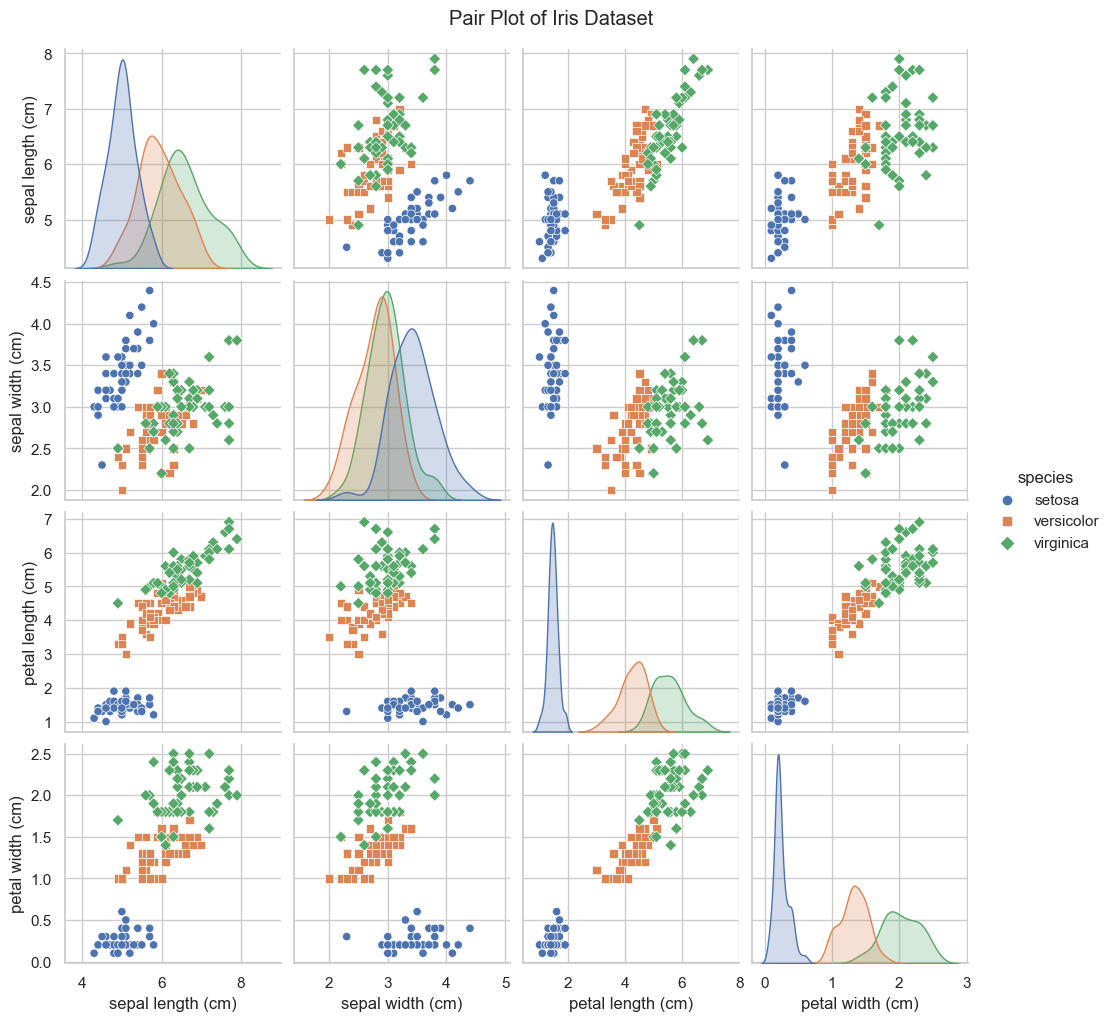

In [3]:
# Pair plot of the dataset
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

## 3. Split the Dataset into Training and Testing Sets

We will split the dataset into training and testing sets. This allows us to train our model on one portion of the data and test its performance on another portion.

In [4]:
# Split the dataset
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training data
X_train.shape

(105, 4)

## 4. Train a K-Nearest Neighbors (KNN) Classifier

We will use the K-Nearest Neighbors algorithm to train a classifier. KNN is a simple and effective classification algorithm that assigns a label to a sample based on the labels of its k nearest neighbors in the feature space.

In [5]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 5. Evaluate the Model

We will evaluate the trained KNN model on the test set by calculating its accuracy and generating a confusion matrix and classification report.

In [6]:
# Predict with the model
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [7]:
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

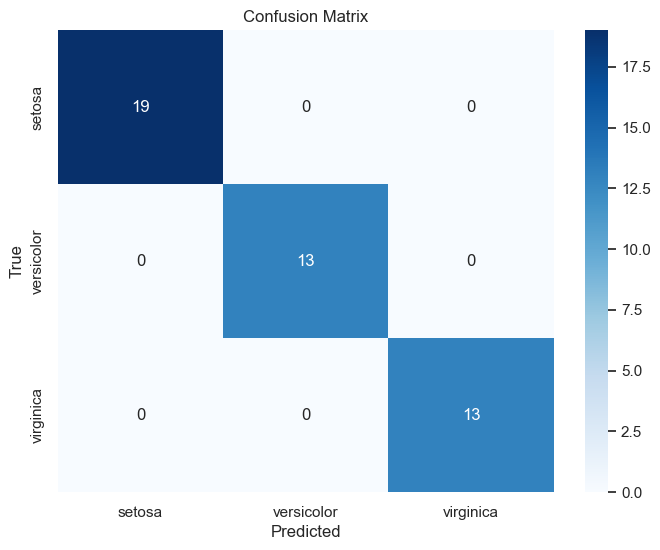

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 6. Visualize the Results

We will visualize the decision boundaries of the KNN model to understand how well it separates the different species in the feature space.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

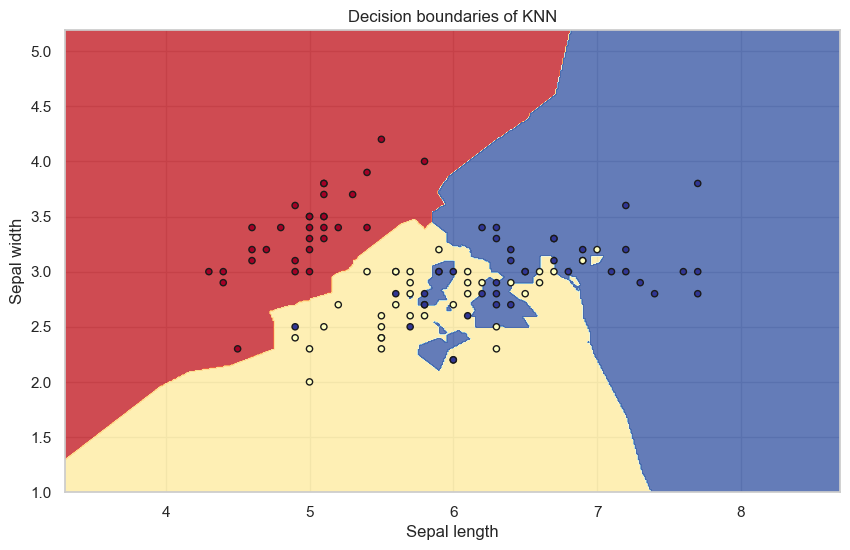

In [10]:
# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model_class, **model_params):
    # Create color maps
    cmap_light = plt.cm.RdYlBu
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

    # Create an instance of the model
    model = model_class(**model_params)
    model.fit(X[:, :2], y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision boundaries of KNN')
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# Plot decision boundaries using the training set
plot_decision_boundaries(X_train, y_train, KNeighborsClassifier, n_neighbors=3)